In [13]:
#carregar dados
import pandas as pd
dados = pd.read_csv('apple_quality.csv')

In [14]:
dados.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
atributos = dados.iloc[0:4000,1:8].values
classe = dados.iloc[0:4000,8:9].values

le = LabelEncoder()
classe_num = le.fit_transform(classe)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
#separar conjuntos
from sklearn.model_selection import train_test_split
treino, teste, classe_treino, classe_teste = train_test_split(atributos, classe_num, test_size=0.3, random_state=42)



In [17]:
from keras.models import Sequential
from keras.layers import Dense

# Inicializar o modelo
mlp = Sequential()

# Adicionar camadas à rede neural
mlp.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform', input_dim=7))  # Substituí input_dim pelo número correto de atributos
mlp.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform'))
mlp.add(Dense(units=1, activation='sigmoid'))

# Compilar o modelo
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Substituí 'binary_accuracy' por 'accuracy'

# Mostrar resumo do modelo
mlp.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                128       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 417 (1.63 KB)
Trainable params: 417 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
import numpy as np

# Converter atributos para float32
treino = treino.astype(np.float32)

# Certificar-se de que os rótulos de classe são do tipo inteiro
classe_treino = classe_treino.astype(np.int32)

# Treinar o modelo
mlp.fit(treino, classe_treino, batch_size=10, epochs=1000, verbose=1)


Epoch 1/1000
280/280 [==============================] - 3s 3ms/step - loss: 0.5507 - accuracy: 0.7311
Epoch 2/1000
280/280 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.8039
Epoch 3/1000
280/280 [==============================] - 2s 6ms/step - loss: 0.3612 - accuracy: 0.8307
Epoch 4/1000
280/280 [==============================] - 1s 4ms/step - loss: 0.3378 - accuracy: 0.8411
Epoch 5/1000
280/280 [==============================] - 1s 4ms/step - loss: 0.3228 - accuracy: 0.8511
Epoch 6/1000
280/280 [==============================] - 2s 5ms/step - loss: 0.3112 - accuracy: 0.8564
Epoch 7/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.3044 - accuracy: 0.8639
Epoch 8/1000
280/280 [==============================] - 2s 8ms/step - loss: 0.2986 - accuracy: 0.8614
Epoch 9/1000
280/280 [==============================] - 2s 5ms/step - loss: 0.2924 - accuracy: 0.8657
Epoch 10/1000
280/280 [==============================] - 1s 5ms/step - loss: 0.286

In [19]:
import numpy as np

# Converter os dados de teste para float32
teste = teste.astype(np.float32)

# Fazer previsões no conjunto de teste
previsoes = mlp.predict(teste)

# Se necessário, arredondar as previsões para obter rótulos binários (0 ou 1)
previsoes_binarias = (previsoes > 0.5).astype(int)


38/38 [==============================] - 0s 1ms/step


In [20]:
previsoes_binarias[1:10]

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [21]:
from sklearn.metrics import confusion_matrix
#calcula matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes_binarias)

In [22]:
matriz

array([[561,  32],
       [ 49, 558]])

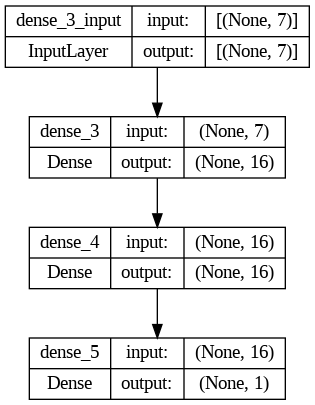

In [23]:
from keras.utils import plot_model
plot_model(mlp, to_file='model_plot.png', show_shapes=True, show_layer_names=True)